Радецкий Алексей Б22-554 Варивнт 6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
from IPython.display import display, Markdown  # для вывода формул в консоль

In [ ]:
def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

def dataframe_to_markdown(df):
    if df.index.name is None:
        first_cell = "Index"
    elif df.columns.name is None:
        first_cell = df.index.name
    else:
        first_cell = df.index.name + "\\" + df.columns.name
    markdown_table = "| " + first_cell + " | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table

def mprint(*strings):  # функция вывода маркдаун в консоль
    for s in strings:
        display(Markdown(s))

# **Задание 1.1**

In [ ]:
xls = pd.ExcelFile('/content/drive/My Drive/data_matstat_K5.xls')
sheetX = xls.parse(2)
X1 = np.array(sheetX['B10'])
X2 = np.array(sheetX['B11'])
X3 = np.array(sheetX['B12'])

In [ ]:
mean_X1 = X1.mean()
mean_X2 = X2.mean()
mean_X3 = X3.mean()

var_X1 = np.var(X1, ddof=1)
var_X2 = np.var(X2, ddof=1)
var_X3 = np.var(X3, ddof=1)

std_X1 = np.std(X1, ddof=1)
std_X2 = np.std(X2, ddof=1)
std_X3 = np.std(X3, ddof=1)

skew_X1 = skew(X1, bias=False)
skew_X2 = skew(X2, bias=False)
skew_X3 = skew(X3, bias=False)

kurt_X1 = kurtosis(X1, bias=False)
kurt_X2 = kurtosis(X2, bias=False)
kurt_X3 = kurtosis(X3, bias=False)

In [ ]:
print("Задание 1.1")
print(f"Среднее значение для столбца B10: {round(mean_X1, 2)}")
print(f"Среднее значение для столбца B11: {round(mean_X2, 2)}")
print(f"Среднее значение для столбца B12: {round(mean_X3, 2)}")
print("\n")
print(f"Выборочная дисперсия для столбца B10: {round(var_X1, 2)}")
print(f"Выборочная дисперсия для столбца B11: {round(var_X2, 2)}")
print(f"Выборочная дисперсия для столбца B12: {round(var_X3, 2)}")
print("\n")

print(f"Выборочное среднеквадратическое отклонение для столбца B10: {round(std_X1, 2)}")
print(f"Выборочное среднеквадратическое отклонение для столбца B11: {round(std_X2, 2)}")
print(f"Выборочное среднеквадратическое отклонение для столбца B12: {round(std_X3, 2)}")
print("\n")

print(f"Выборочный коэффициент асимметрии для столбца B10: {round(skew_X1, 2)}")
print(f"Выборочный коэффициент асимметрии для столбца B11: {round(skew_X2, 2)}")
print(f"Выборочный коэффициент асимметрии для столбца B12: {round(skew_X3, 2)}")
print("\n")

print(f"Выборочный эксцесс для столбца B10: {round(kurt_X1, 2)}")
print(f"Выборочный эксцесс для столбца B11: {round(kurt_X2, 2)}")
print(f"Выборочный эксцесс для столбца B12: {round(kurt_X3, 2)}")

Задание 1.1
Среднее значение для столбца B10: 100.82
Среднее значение для столбца B11: 92.56
Среднее значение для столбца B12: 99.9


Выборочная дисперсия для столбца B10: 71.07
Выборочная дисперсия для столбца B11: 116.27
Выборочная дисперсия для столбца B12: 51.32


Выборочное среднеквадратическое отклонение для столбца B10: 8.43
Выборочное среднеквадратическое отклонение для столбца B11: 10.78
Выборочное среднеквадратическое отклонение для столбца B12: 7.16


Выборочный коэффициент асимметрии для столбца B10: 0.68
Выборочный коэффициент асимметрии для столбца B11: 0.84
Выборочный коэффициент асимметрии для столбца B12: 1.5


Выборочный эксцесс для столбца B10: 0.99
Выборочный эксцесс для столбца B11: 2.25
Выборочный эксцесс для столбца B12: 7.47


# **Задание 1.2**

In [ ]:
n = len(X1)
k = round(1 + 3.322 * math.log10(n))
min_X1 = np.min(X1)
max_X1 = np.max(X1)
w = (max_X1 - min_X1) / k;

print("Объем выборки:", n)
print(f"Рассчет числа групп по ф-ле Стерджесса: {k}")
print(f"Ширина интревалов: {round(w, 2)}")

Объем выборки: 252
Рассчет числа групп по ф-ле Стерджесса: 9
Ширина интревалов: 6.32


In [ ]:
intervals = [round(min_X1 + i * w, 2) for i in range(k + 1)]
frequencies = []

for i in range(k):
    count = ((X1 >= intervals[i]) & (X1 < intervals[i + 1])).sum()
    frequencies.append(count)

# Ensure all lists are of the same length
lower_bounds = intervals[:-1]
upper_bounds = intervals[1:]

frequency_table = pd.DataFrame({
    'Номер интервала': range(1, k + 1),
    'Нижняя граница': lower_bounds,
    'Верхняя граница': upper_bounds,
    'Частота': frequencies
})

frequency_table['Относительная частота'] = frequency_table['Частота'] / n
frequency_table['Относительная частота'] = frequency_table['Относительная частота'].round(3)

frequency_table['Накопленная частота'] = frequency_table['Частота'].cumsum()

frequency_table['Относительная накопленная частота'] = frequency_table['Относительная частота'].cumsum()
frequency_table['Относительная накопленная частота'] = frequency_table['Относительная накопленная частота'].round(3)

frequency_table

,Номер интервала,Нижняя граница,Верхняя граница,Частота,Относительная частота,Накопленная частота,Относительная накопленная частота
0,1,79.30,85.62,3,0.012,3,0.012
1,2,85.62,91.94,27,0.107,30,0.119
2,3,91.94,98.27,69,0.274,99,0.393
3,4,98.27,104.59,80,0.317,179,0.710
4,5,104.59,110.91,42,0.167,221,0.877
5,6,110.91,117.23,19,0.075,240,0.952
6,7,117.23,123.56,10,0.040,250,0.992
7,8,123.56,129.88,1,0.004,251,0.996
8,9,129.88,136.20,0,0.000,251,0.996


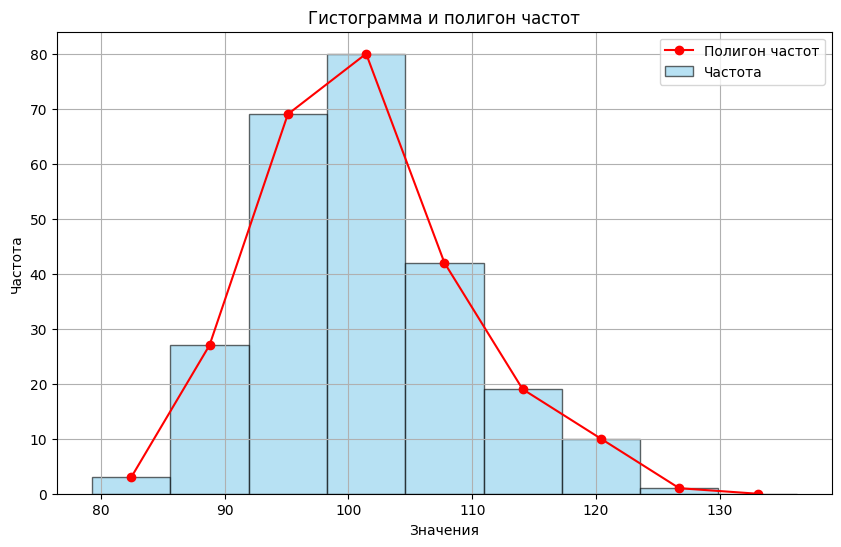

In [ ]:
# Calculate bin centers
bin_edges = intervals
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]

hist = frequencies  # This is the list of frequencies
relative_freq = frequency_table['Относительная частота'].tolist()
cumulative_freq = frequency_table['Накопленная частота'].tolist()
cumulative_relative_freq = np.cumsum(relative_freq)

# Plotting the graphs
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, hist, width=w, alpha=0.6, color='skyblue', edgecolor='black', label='Частота')
plt.plot(bin_centers, hist, marker='o', color='red', label='Полигон частот')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма и полигон частот')
plt.legend()
plt.grid(True)
plt.show()

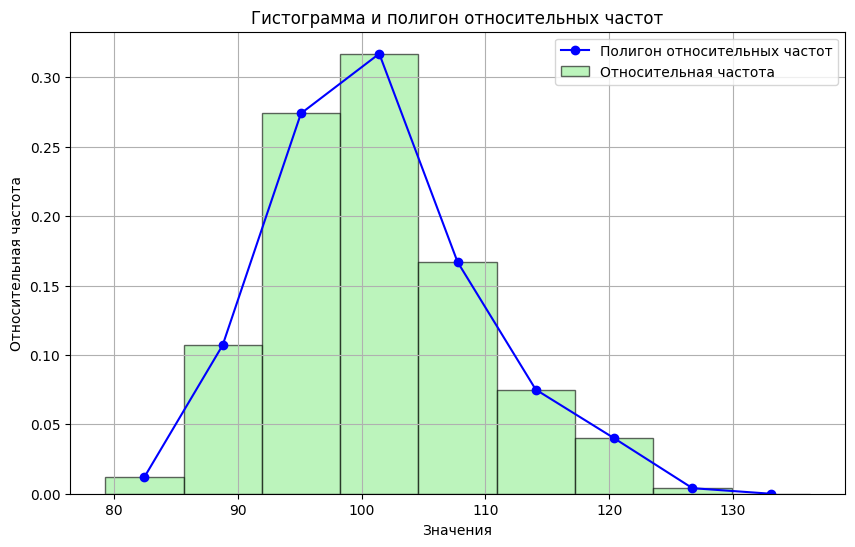

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, relative_freq, width=w, alpha=0.6, color='lightgreen', edgecolor='black', label='Относительная частота')
plt.plot(bin_centers, relative_freq, marker='o', color='blue', label='Полигон относительных частот')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.title('Гистограмма и полигон относительных частот')
plt.legend()
plt.grid(True)
plt.show()


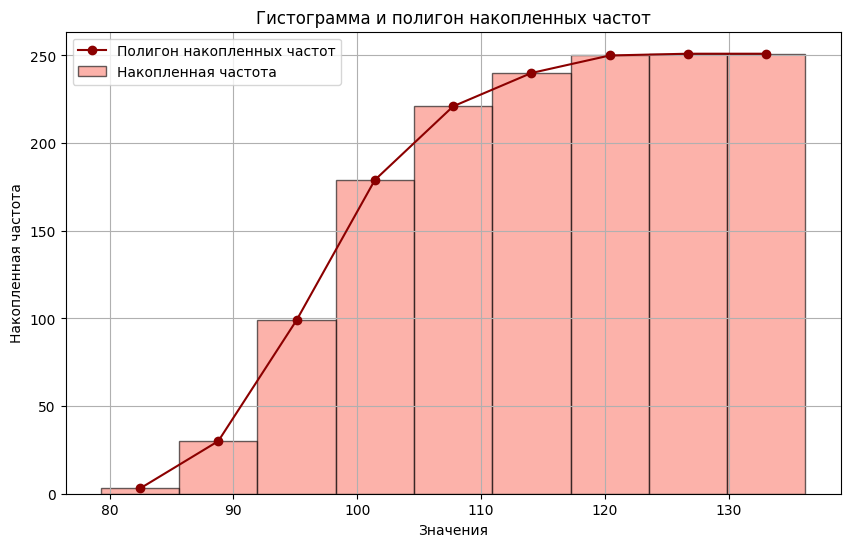

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, cumulative_freq, width=w, alpha=0.6, color='salmon', edgecolor='black', label='Накопленная частота')
plt.plot(bin_centers, cumulative_freq, marker='o', color='darkred', label='Полигон накопленных частот')
plt.xlabel('Значения')
plt.ylabel('Накопленная частота')
plt.title('Гистограмма и полигон накопленных частот')
plt.legend()
plt.grid(True)
plt.show()

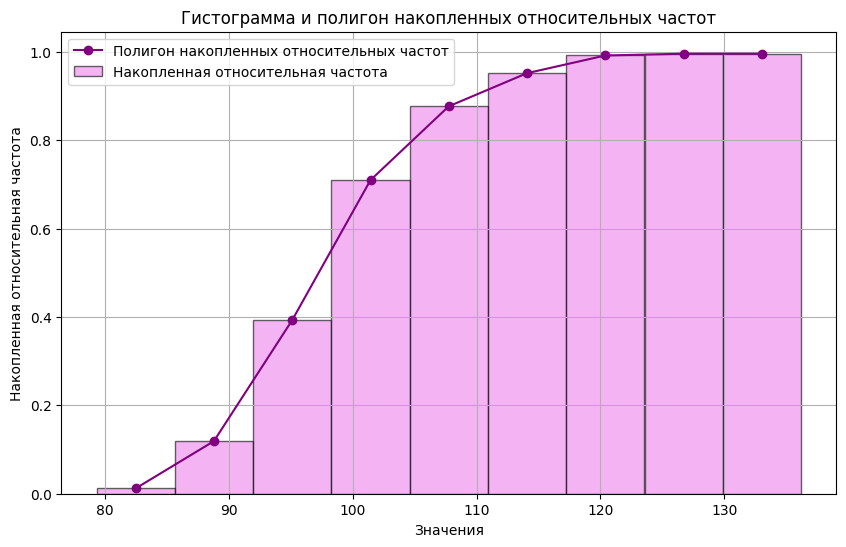

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, cumulative_relative_freq, width=w, alpha=0.6, color='violet', edgecolor='black', label='Накопленная относительная частота')
plt.plot(bin_centers, cumulative_relative_freq, marker='o', color='purple', label='Полигон накопленных относительных частот')
plt.xlabel('Значения')
plt.ylabel('Накопленная относительная частота')
plt.title('Гистограмма и полигон накопленных относительных частот')
plt.legend()
plt.grid(True)
plt.show()

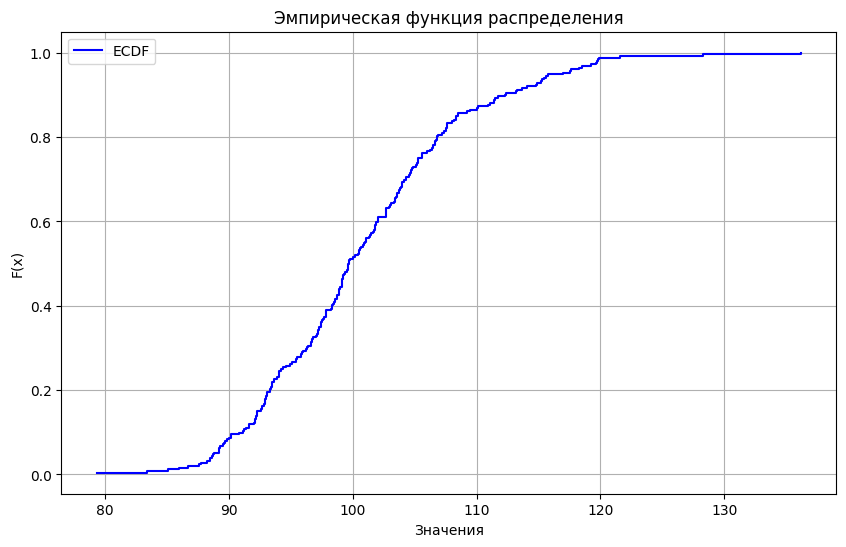

In [ ]:
X1_sorted = np.sort(X1)
n = len(X1)
ecdf = np.arange(1, n + 1) / n

plt.figure(figsize=(10, 6))
plt.step(X1_sorted, ecdf, where='post', color='blue', label='ECDF')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.title('Эмпирическая функция распределения')
plt.legend()
plt.grid(True)
plt.show()

# **Задание 2.1**

In [ ]:
# Уровни значимости L
levels = [0.01, 0.05, 0.1]

# Расчет доверительных интервалов
conf_intervals = {}
mean = np.mean(X1)
std_err = stats.sem(X1)

for l in levels:
    crit_value = stats.t.ppf(1 - l/2, df=len(X1) - 1)
    margin_of_error = crit_value * std_err
    conf_intervals[l] = (round(mean - margin_of_error, 2), round(mean + margin_of_error, 2))

# Создание таблицы
results = pd.DataFrame({
    'Граница доверительного интервала': ['Нижняя граница', 'Верхняя граница'],
    'L=0.01': [conf_intervals[0.01][0], conf_intervals[0.01][1]],
    'L=0.05': [conf_intervals[0.05][0], conf_intervals[0.05][1]],
    'L=0.1': [conf_intervals[0.1][0], conf_intervals[0.1][1]]
})

print(results)

  Граница доверительного интервала  L=0.01  L=0.05   L=0.1
0                   Нижняя граница   99.45   99.78   99.95
1                  Верхняя граница  102.20  101.87  101.70


# **Задание 2.2**

In [ ]:
# Расчет доверительных интервалов для дисперсии
conf_intervals_var = {}
n = len(X1)
sample_variance = np.var(X1, ddof=1)

for l in levels:
    chi2_lower = stats.chi2.ppf(1 - l/2, df=n-1)
    chi2_upper = stats.chi2.ppf(l/2, df=n-1)
    lower_bound = (n - 1) * sample_variance / chi2_lower
    upper_bound = (n - 1) * sample_variance / chi2_upper
    conf_intervals_var[l] = (round(lower_bound, 2), round(upper_bound, 2))

# Создание таблицы
results_var = pd.DataFrame({
    'Граница доверительного интервала': ['Нижняя граница', 'Верхняя граница'],
    'L=0.01': [conf_intervals_var[0.01][0], conf_intervals_var[0.01][1]],
    'L=0.05': [conf_intervals_var[0.05][0], conf_intervals_var[0.05][1]],
    'L=0.1': [conf_intervals_var[0.1][0], conf_intervals_var[0.1][1]]
})

print(results_var)

  Граница доверительного интервала  L=0.01  L=0.05  L=0.1
0                   Нижняя граница   57.09   60.11  61.74
1                  Верхняя граница   90.53   85.35  82.85


# **Задание 2.3**

In [ ]:
# Доверительный интервал для разности математических ожиданий
mean1, mean2 = np.mean(X1), np.mean(X2)
std1, std2 = np.std(X1, ddof=1), np.std(X2, ddof=1)
n1, n2 = len(X1), len(X2)
se_diff = np.sqrt((std1 ** 2 / n1) + (std2 ** 2 / n2))
diff_mean = mean1 - mean2
conf_intervals_mean = {}
for l in levels:
    t_critical = stats.t.ppf(1 - l / 2, df=n1 + n2 - 2)
    lower_bound = diff_mean - t_critical * se_diff
    upper_bound = diff_mean + t_critical * se_diff
    conf_intervals_mean[l] = (round(lower_bound, 2), round(upper_bound, 2))

# Создание таблиц
results_mean = pd.DataFrame({
    'Граница доверительного интервала': ['Нижняя граница', 'Верхняя граница'],
    'L=0.01': [conf_intervals_mean[0.01][0], conf_intervals_mean[0.01][1]],
    'L=0.05': [conf_intervals_mean[0.05][0], conf_intervals_mean[0.05][1]],
    'L=0.1': [conf_intervals_mean[0.1][0], conf_intervals_mean[0.1][1]]
})

print("Доверительные интервалы для разности мат. ожиданий:")
print(results_mean)

Доверительные интервалы для разности мат. ожиданий:
  Граница доверительного интервала  L=0.01  L=0.05  L=0.1
0                   Нижняя граница    6.04    6.57   6.85
1                  Верхняя граница   10.50    9.96   9.69


# **Задание 2.4**

In [ ]:
# Доверительный интервал для отношения дисперсий
var1, var2 = std1 ** 2, std2 ** 2
conf_intervals_var_ratio = {}
for l in levels:
    f_critical_low = stats.f.ppf(1 - l / 2, dfn=n1 - 1, dfd=n2 - 1)
    f_critical_high = stats.f.ppf(l / 2, dfn=n1 - 1, dfd=n2 - 1)

    lower_bound = (var1 / var2) * f_critical_high
    upper_bound = (var1 / var2) * f_critical_low
    conf_intervals_var_ratio[l] = (round(lower_bound, 2), round(upper_bound, 2))

results_var_ratio = pd.DataFrame({
    'Граница доверительного интервала': ['Нижняя граница', 'Верхняя граница'],
    'L=0.01': [conf_intervals_var_ratio[0.01][0], conf_intervals_var_ratio[0.01][1]],
    'L=0.05': [conf_intervals_var_ratio[0.05][0], conf_intervals_var_ratio[0.05][1]],
    'L=0.1': [conf_intervals_var_ratio[0.1][0], conf_intervals_var_ratio[0.1][1]]
})
print("\nДоверительные интервалы для отношения дисперсий:")
print(results_var_ratio)


Доверительные интервалы для отношения дисперсий:
  Граница доверительного интервала  L=0.01  L=0.05  L=0.1
0                   Нижняя граница    0.44    0.48   0.50
1                  Верхняя граница    0.85    0.78   0.75


# **Задание 3.1**

In [ ]:
X = X1
alpha = 0.1
m0_list = [100, 105, 200]

mprint(r"### T-test")
for m0 in m0_list:
    z, p_value = stats.ttest_1samp(X, m0)
    mprint(
        r"---",
        f"$H_0: m = m_0 = {m0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### T-test

---

$H_0: m = m_0 = 100$

$z_{выб} =$ 1.55

$p =$ 0.12

$H_0$ принимается

---

$H_0: m = m_0 = 105$

$z_{выб} =$ -7.86

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: m = m_0 = 200$

$z_{выб} =$ -186.75

$p =$ 0.00

$H_0$ отклоняется

#**Задание 3.2**

In [ ]:
def chisquare(X, value):
    n = len(X)
    z = (n - 1) * X.var(ddof=1) / value**2
    cdf = stats.chi2.cdf(z, df=n - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [ ]:
alpha = 0.1
std0_list = [8.5, 10, 50]

mprint(r"### $\chi^2$-test")
for std0 in std0_list:
    z, p_value = chisquare(X, std0)
    mprint(
        r"---",
        f"$H_0: \\sigma = \\sigma_0 = {std0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### $\chi^2$-test

---

$H_0: \sigma = \sigma_0 = 8.5$

$z_{выб} =$ 246.91

$p =$ 0.88

$H_0$ принимается

---

$H_0: \sigma = \sigma_0 = 10$

$z_{выб} =$ 178.39

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: \sigma = \sigma_0 = 50$

$z_{выб} =$ 7.14

$p =$ 0.00

$H_0$ отклоняется

#**Задание 3.3**

In [ ]:
alphas = [0.01, 0.05, 0.1]
z, p_value = stats.ttest_ind(X1, X2)
mprint(
    r"### two-sample T-test",
    f"$H_0: m_1 = m_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)
for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### two-sample T-test

$H_0: m_1 = m_2$

$z_{выб} =$ 9.59

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

#**Задание 3.4**

In [ ]:
def Ftest(X1, X2):
    n1 = len(X1)
    n2 = len(X2)
    z = X1.var(ddof=1) / X2.var(ddof=1)
    cdf = stats.f.cdf(z, dfn=n1 - 1, dfd=n2 - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [ ]:
alphas = [0.01, 0.05, 0.1]
z, p_value = Ftest(X1, X2)
mprint(
    r"### F-test",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### F-test

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 0.61

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

#**Задание 4.1**

In [ ]:
k = round(1 + 1.3 * math.log(n))
k

8

In [ ]:
X = X1
frequences, bin_edges = np.histogram(X, bins=k)
bin_edges

array([ 79.3   ,  86.4125,  93.525 , 100.6375, 107.75  , 114.8625,
       121.975 , 129.0875, 136.2   ])

In [ ]:
bin_edges[0] = -1000
bin_edges[-1] = 1000
bin_edges

array([-1000.    ,    86.4125,    93.525 ,   100.6375,   107.75  ,
         114.8625,   121.975 ,   129.0875,  1000.    ])

In [ ]:
probabilities = np.diff(stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf(bin_edges))
probabilities

array([0.04368129, 0.14961536, 0.29786886, 0.30315907, 0.15773741,
       0.04188176, 0.00565585, 0.0004004 ])

In [ ]:
def get_expected_frequencies(bin_edges, n, cdf=stats.norm.cdf):
    probabilities = np.diff(cdf(bin_edges))
    return n * probabilities

In [ ]:
get_expected_frequencies(
    bin_edges, n, cdf=stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf
)

array([11.00768476, 37.7030713 , 75.06295197, 76.39608447, 39.74982698,
       10.5542042 ,  1.42527431,  0.10090202])

In [ ]:
def merge_interval(bin_edges, expected_frequencies, i):
    # Объединяем два интервала в зависимости от их индексов.
    if i == 0:  # Крайний левый интервал
        bin_edges.pop(i + 1)
        expected_frequencies[i + 1] += expected_frequencies[i]
    elif i == len(bin_edges) - 2:  # Крайний правый интервал
        bin_edges.pop(i)
        expected_frequencies[i - 1] += expected_frequencies[i]
    else:  # Объединяем с соседом c наименьшим expected_frequencies
        if expected_frequencies[i - 1] < expected_frequencies[i + 1]:
            bin_edges.pop(i)
            expected_frequencies[i - 1] += expected_frequencies[i]
        else:
            bin_edges.pop(i + 1)
            expected_frequencies[i + 1] += expected_frequencies[i]
    expected_frequencies.pop(i)


def adjust_intervals(bin_edges, n, distrib=stats.norm, k=None):
    """
    Функция для корректировки интервалов и вероятностей

    Параметры:
    bin_edges: Границы интервалов
    n: uint - объем выборки
    distrib: распределение, которое мы хотим использовать для подсчета вероятностей
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой ожидаемой частотой с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой ожидаемой частотой, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых ожидаемая частота большая, таким образом получая на выходе k >= len(intervals).
    """
    cdf = distrib.cdf
    ppf = distrib.ppf
    expected_frequencies = get_expected_frequencies(bin_edges, n, cdf=cdf).tolist()
    if type(bin_edges) == np.ndarray:
        bin_edges = bin_edges.tolist()

    # Слияние интервалов с ожидаемой частотой <= 5
    i = 0
    while True:
        if expected_frequencies[i] <= 5:
            merge_interval(bin_edges, expected_frequencies, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    # Разбиение интервалов с максимальной ожидаемой частотой.
    if k is not None:
        while len(bin_edges) < k + 1:
            max_expected_frequency = max(expected_frequencies)

            # если максимальная ожидаемая частота меньше 10, то нельзя подразбивать интервалы
            if max_expected_frequency < 10:
                break

            max_index = expected_frequencies.index(max_expected_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что ожидаемая частота в интервалах (a, c) и (c, b) как минимум 5
            c = (ppf(cdf(a) + 5 / n) + ppf(cdf(b) - 5 / n)) / 2

            e_left, e_right = get_expected_frequencies([a, c, b], n, cdf=cdf)

            bin_edges.insert(max_index + 1, c)

            expected_frequencies[max_index] = e_left
            expected_frequencies.insert(max_index + 1, e_right)

    return np.array(bin_edges), np.array(expected_frequencies)

In [ ]:
bin_edges, expected_frequencies = adjust_intervals(
    bin_edges, n, distrib=stats.norm(loc=X.mean(), scale=X.std(ddof=1)), k=8
)
bin_edges, expected_frequencies

(array([-1000.        ,    86.4125    ,    93.525     ,    97.16739447,
          100.6375    ,   104.11751565,   107.75      ,   114.8625    ,
         1000.        ]),
 array([11.00768476, 37.7030713 , 35.01145239, 40.05149958, 40.52262244,
        35.87346203, 39.74982698, 12.08038053]))

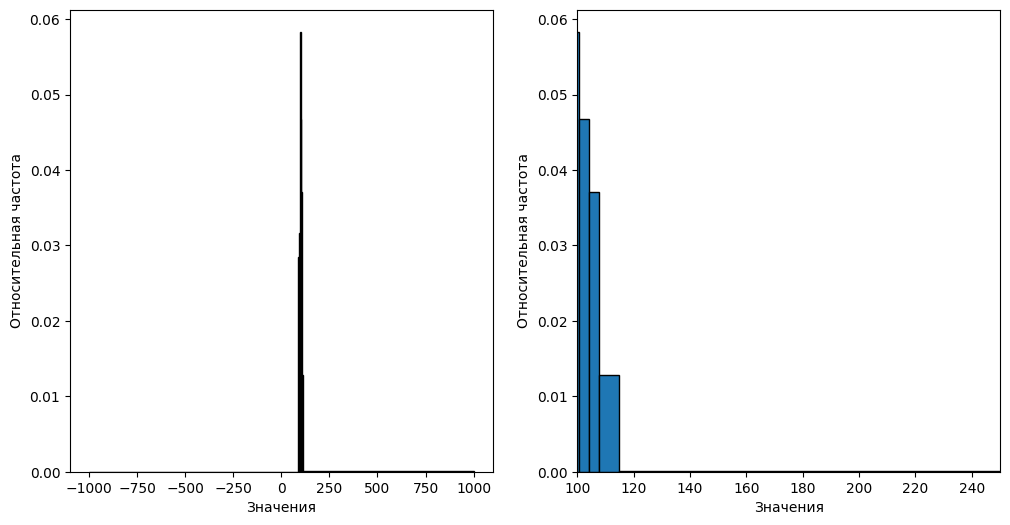

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[0].set_xlabel("Значения")
axes[0].set_ylabel("Относительная частота")

axes[1].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[1].set_xlabel("Значения")
axes[1].set_ylabel("Относительная частота")
plt.xlim(100, 250)

plt.show()

In [ ]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 3.47 до 1086.41

In [ ]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency"] = groups.apply(
    lambda row: ((X >= row["low edge"]) & (X < row["high edge"])).sum(), axis=1
)
groups["relative frequency"] = groups["frequency"] / n
groups["expected probability"] = expected_frequencies / n
groups

,low edge,high edge,frequency,relative frequency,expected probability
Номер интервала,,,,,
1,-1000.000000,86.412500,4,0.015873,0.043681
2,86.412500,93.525000,51,0.202381,0.149615
3,93.525000,97.167394,29,0.115079,0.138934
4,97.167394,100.637500,51,0.202381,0.158935
5,100.637500,104.117516,41,0.162698,0.160804
6,104.117516,107.750000,34,0.134921,0.142355
7,107.750000,114.862500,23,0.091270,0.157737
8,114.862500,1000.000000,19,0.075397,0.047938


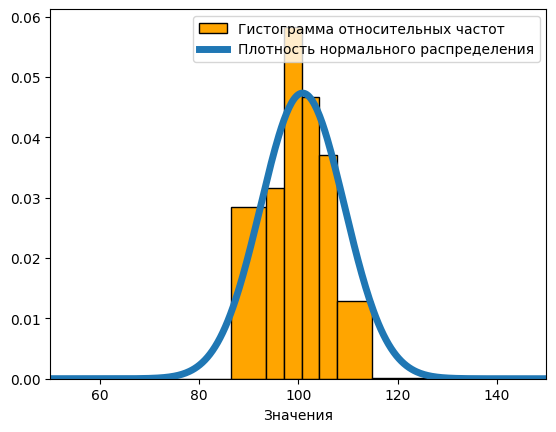

In [ ]:
grid = np.linspace(X.min() - 100, X.max() + 100, 1000)
plt.hist(
    X,
    bins=bin_edges,
    edgecolor="black",
    density=True,
    label="Гистограмма относительных частот",
    color="orange",
)

plt.plot(
    grid,
    stats.norm.pdf(grid, loc=X.mean(), scale=X.std(ddof=1)),
    label="Плотность нормального распределения",
    lw=5,
)
plt.legend()
plt.xlim(50, 150)
plt.xlabel("Значения")
plt.show()

In [ ]:
alphas = [0.01, 0.05, 0.1]

z, p_value = stats.chisquare(groups["frequency"], expected_frequencies, ddof=2)
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 24.30

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

#**Задание 4.2**

In [ ]:
z, p_value = stats.jarque_bera(X)
mprint(
    r"### Jarque-Bera test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Jarque-Bera test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 28.64

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

#**Задание 5.1**

In [ ]:
def sign_test(X, Y):
    if len(X) != len(Y):
        raise ValueError("Длины выборок должны совпадать")
    n = len(X)
    k = sum(X > Y)
    z = (k - n / 2) / math.sqrt(n / 4)
    p_value = 2 * min(stats.norm.cdf(z), 1 - stats.norm.cdf(z))
    return z, p_value

In [ ]:
alphas = [0.01, 0.05, 0.1]
X = X1
Y = X2

z, p_value = sign_test(X, Y)
mprint(
    r"### Sign test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Sign test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 14.74

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

#**Задание 5.2**

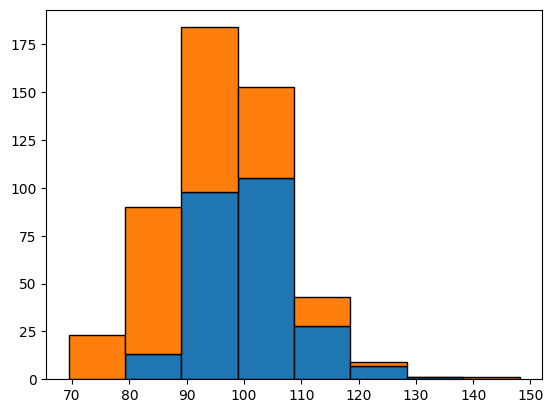

In [ ]:
k = round(1 + 1.3 * math.log(max(n1, n2)))

frequences, bin_edges, _ = plt.hist((X, Y), bins=k, edgecolor="black", stacked=True)
plt.show()

In [ ]:
frequences[1]

array([ 23.,  90., 184., 153.,  43.,   9.,   1.,   1.])

In [ ]:
def merge_interval(bin_edges, frequences1, frequences2, i):
    # Объединяем два интервала в зависимости от их индексов.
    if i == 0:  # Крайний левый интервал
        bin_edges.pop(i + 1)
        frequences1[i + 1] += frequences1[i]
        frequences2[i + 1] += frequences2[i]
    elif i == len(bin_edges) - 2:  # Крайний правый интервал
        bin_edges.pop(i)
        frequences1[i - 1] += frequences1[i]
        frequences2[i - 1] += frequences2[i]
    else:  # Объединяем с соседом c наименьшим expected_frequencies
        if (
            frequences1[i - 1] + frequences2[i - 1]
            < frequences1[i + 1] + frequences2[i + 1]
        ):
            bin_edges.pop(i)
            frequences1[i - 1] += frequences1[i]
            frequences2[i - 1] += frequences2[i]
        else:
            bin_edges.pop(i + 1)
            frequences1[i + 1] += frequences1[i]
            frequences2[i + 1] += frequences2[i]
    frequences1.pop(i)
    frequences2.pop(i)


def adjust_intervals(bin_edges, X1, X2, k=None):
    """
    Функция для корректировки интервалов и частот попадания в них
    bin_edges: Границы интервалов
    X1: Первая выборка
    X2: Вторая выборка
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой частотой попадания с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой частотой попадания, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых частота попадания большая, таким образом получая на выходе k >= len(intervals).
    """
    frequences1, _ = np.histogram(X1, bins=bin_edges)
    frequences2, _ = np.histogram(X2, bins=bin_edges)
    frequences1 = frequences1.tolist()
    frequences2 = frequences2.tolist()

    # Слияние интервалов с малой частотой попадания
    i = 0
    while True:
        if frequences1[i] + frequences2[i] < 5:
            merge_interval(bin_edges, frequences1, frequences2, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    # Разбиение интервалов с максимальной частотой попадания
    if k is not None:
        while len(bin_edges) < k + 1:
            total_frequency = [x + y for x, y in zip(frequences1, frequences2)]
            max_frequency = max(total_frequency)

            # если максимальная частота меньше 5, то нельзя подразбивать интервалы
            if max_frequency < 10:
                break

            max_index = total_frequency.index(max_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что частота попадания в интервалах (a, c) и (c, b) как минимум 5
            c = (a + b) / 2

            frequences1[max_index] = ((X1 >= a) & (X1 < c)).sum()
            frequences2[max_index] = ((X2 >= a) & (X2 < c)).sum()
            frequences1.insert(max_index + 1, ((X1 >= c) & (X1 < b)).sum())
            frequences2.insert(max_index + 1, ((X2 >= c) & (X2 < b)).sum())
            bin_edges.insert(max_index + 1, c)

    return bin_edges, frequences1, frequences2

In [ ]:
bin_edges, frequences1, frequences2 = adjust_intervals(bin_edges.tolist(), X, Y, k=k)
np.array(frequences1) + np.array(frequences2)

array([23, 90, 93, 91, 88, 65, 43, 11])

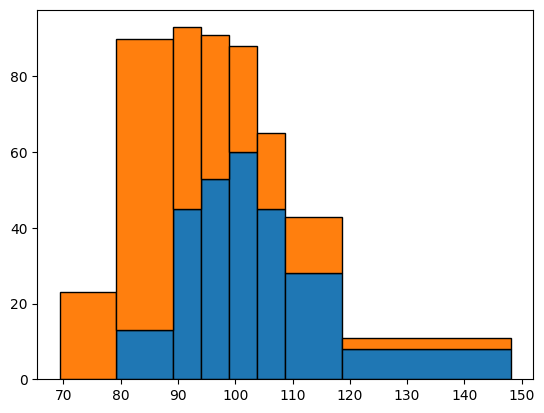

In [ ]:
frequences, bin_edges, _ = plt.hist(
    (X, Y), bins=bin_edges, edgecolor="black", stacked=True
)
plt.show()

In [ ]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 4.92 до 29.51

In [ ]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency1"] = frequences[0]
groups["frequency2"] = frequences[1] - frequences[0]
groups["relative frequency1"] = groups["frequency1"] / n1
groups["relative frequency2"] = groups["frequency2"] / n2

groups

,low edge,high edge,frequency1,frequency2,relative frequency1,relative frequency2
Номер интервала,,,,,,
1,69.40000,79.23750,0.0,23.0,0.000000,0.091270
2,79.23750,89.07500,13.0,77.0,0.051587,0.305556
3,89.07500,93.99375,45.0,48.0,0.178571,0.190476
4,93.99375,98.91250,53.0,38.0,0.210317,0.150794
5,98.91250,103.83125,60.0,28.0,0.238095,0.111111
6,103.83125,108.75000,45.0,20.0,0.178571,0.079365
7,108.75000,118.58750,28.0,15.0,0.111111,0.059524
8,118.58750,148.10000,8.0,3.0,0.031746,0.011905


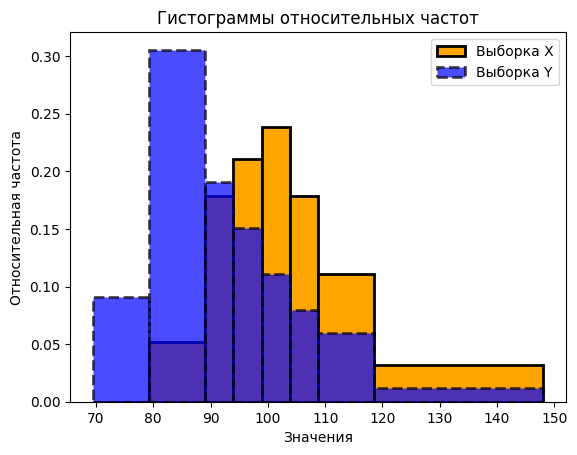

In [ ]:
plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency1"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка X",
    color="orange",
    lw=2,
)

plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency2"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка Y",
    alpha=0.7,
    linestyle="--",
    lw=2,
    color="blue",
)
plt.legend()
plt.title("Гистограммы относительных частот")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")
plt.show()

In [ ]:
def chi2_2samp(frequencies1, frequencies2):
    if len(frequencies1) != len(frequencies2):
        raise ValueError("Длины выборок должны совпадать")
    k = len(frequencies1)
    n = sum(frequencies1)
    m = sum(frequencies2)
    z = (
        n
        * m
        * sum(
            (frequencies1 / n - frequencies2 / m) ** 2 / (frequencies1 + frequencies2)
        )
    )
    p_value = stats.chi2.sf(z, df=k - 1)
    return z, p_value

In [ ]:
alphas = [0.01, 0.05, 0.1]

z, p_value = chi2_2samp(groups["frequency1"], groups["frequency2"])
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 98.54

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

#**Задание 6**

In [ ]:
sheetX = xls.parse(2)
X = np.array(sheetX['B3'])
Y = np.array(sheetX['B6'])

In [ ]:
df = pd.DataFrame({"X": X, "Y": Y})
df

,X,Y
0,normal,Somerville
1,low,Somerville
2,high,Somerville
3,normal,Somerville
4,high,Somerville
...,...,...
247,normal,Revere
248,high,Revere
249,high,Revere
250,high,Revere


In [ ]:
emperical_table = pd.crosstab(df["X"], df["Y"], margins=True)
emperical_table

Y,Arlington,Norwood,Revere,Somerville,All
X,,,,,
high,39,20,39,22,120
low,8,4,11,16,39
normal,26,17,32,18,93
All,73,41,82,56,252


In [ ]:
V1 = np.array(emperical_table.iloc[:-1, -1])
V1

array([120,  39,  93])

In [ ]:
V1 = np.atleast_2d(V1).T
V1

array([[120],
       [ 39],
       [ 93]])

In [ ]:
V2 = np.array(emperical_table.iloc[-1][:-1])
V2

array([73, 41, 82, 56])

In [ ]:
V2 = np.atleast_2d(V2)
V2

array([[73, 41, 82, 56]])

In [ ]:
A = np.dot(V1, V2)
A

array([[8760, 4920, 9840, 6720],
       [2847, 1599, 3198, 2184],
       [6789, 3813, 7626, 5208]])

In [ ]:
theoretical_table = pd.DataFrame(
    A / n,
    index=emperical_table.index[:-1],
    columns=emperical_table.columns[:-1],
)
theoretical_table

Y,Arlington,Norwood,Revere,Somerville
X,,,,
high,34.761905,19.523810,39.047619,26.666667
low,11.297619,6.345238,12.690476,8.666667
normal,26.940476,15.130952,30.261905,20.666667


In [ ]:
theoretical_table["All"] = theoretical_table.sum(axis=1)
theoretical_table.loc["All"] = theoretical_table.sum()
theoretical_table

Y,Arlington,Norwood,Revere,Somerville,All
X,,,,,
high,34.761905,19.523810,39.047619,26.666667,240.0
low,11.297619,6.345238,12.690476,8.666667,78.0
normal,26.940476,15.130952,30.261905,20.666667,186.0
All,146.000000,82.000000,164.000000,112.000000,1008.0


In [ ]:
alphas = [0.01, 0.05, 0.1]

res = stats.chi2_contingency(emperical_table.iloc[:-1, :-1])
res

Chi2ContingencyResult(statistic=10.312314424310156, pvalue=0.11210105088453722, dof=6, expected_freq=array([[34.76190476, 19.52380952, 39.04761905, 26.66666667],
       [11.29761905,  6.3452381 , 12.69047619,  8.66666667],
       [26.94047619, 15.13095238, 30.26190476, 20.66666667]]))

In [ ]:
z = res.statistic
p = res.pvalue

mprint(
    r"### $\chi^2$-test",
    f"$H_0:\\ F_Y(y \\mid_{{X = x^{{(1)}}}}) = F_Y(y \\mid_{{X = x^{{(2)}}}}) = \\dots = F_Y(y \\mid_{{X = x^{{(k_1)}}}}) = F_Y(y)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p)}")

### $\chi^2$-test

$H_0:\ F_Y(y \mid_{X = x^{(1)}}) = F_Y(y \mid_{X = x^{(2)}}) = \dots = F_Y(y \mid_{X = x^{(k_1)}}) = F_Y(y)$

$z_{выб} =$ 10.31

$p =$ 0.11

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

#**Задание 7**

In [ ]:
sheetX = xls.parse(2)
X = np.array(sheetX['B6'])
Y = np.array(sheetX['B2'])

In [ ]:
df = pd.DataFrame({"X": X, "Y": Y}).groupby("X")["Y"].apply(np.array).to_frame()
df

,Y
X,
Arlington,"[20.4, 28.0, 31.5, 24.6, 26.1, 29.8, 30.7, 25...."
Norwood,"[14.9, 18.1, 22.7, 23.6, 26.1, 24.4, 27.1, 21...."
Revere,"[3.0, 0.7, 20.5, 16.9, 25.3, 9.9, 13.1, 29.9, ..."
Somerville,"[12.3, 6.1, 25.3, 10.4, 28.7, 20.9, 19.2, 12.4..."


In [ ]:
print(n1 := len(X), n2 := len(Y))
if n1 == n2:
    n = n1

252 252


In [ ]:
k = 4
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="№ п/п"))
groups[r"$x^{(i)}$"] = df.index
groups[r"$n_i$"] = df["Y"].apply(len).values
groups[r"$\overline{y_i}$"] = df["Y"].apply(np.mean).values
groups[r"$s_i^2$"] = df["Y"].apply(np.var, ddof=0).values
groups

,$x^{(i)}$,$n_i$,$\overline{y_i}$,$s_i^2$
№ п/п,,,,
1,Arlington,73,20.056164,41.794791
2,Norwood,41,19.321951,45.289518
3,Revere,82,19.731707,85.169239
4,Somerville,56,16.994643,95.324436


In [ ]:
S_general = float(Y.var(ddof=0))
S_inside = 1 / n * sum(groups[r"$n_i$"] * groups[r"$s_i^2$"])
S_between = (
    1 / n * sum(groups[r"$n_i$"] * (groups[r"$\overline{y_i}$"] - Y.mean()) ** 2)
)

S_general_unbiased = S_general * n / (n - 1)
S_inside_unbiased = S_inside * n / (n - k)
S_between_unbiased = S_between * n / (k - 1)

mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр, несмещ}}}} = {S_between_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр, несмещ}}}} = {S_inside_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ, несмещ}}}} = {S_general_unbiased:.2f}$",
)

$\tilde{D}_{\text{межгр}} = 1.39$

$\tilde{D}_{\text{внутр}} = 68.37$

$\tilde{D}_{\text{общ}} = 69.76$

$\tilde{D}_{\text{межгр, несмещ}} = 116.35$

$\tilde{D}_{\text{внутр, несмещ}} = 69.48$

$\tilde{D}_{\text{общ, несмещ}} = 70.04$

In [ ]:
mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} + \\tilde{{D}}_{{\\text{{внутр}}}} = {S_between + S_inside:.2f}$",
)
print(S_between + S_inside - S_general < 1e-10)

$\tilde{D}_{\text{межгр}} = 1.39$

$\tilde{D}_{\text{внутр}} = 68.37$

$\tilde{D}_{\text{общ}} = 69.76$

$\tilde{D}_{\text{межгр}} + \tilde{D}_{\text{внутр}} = 69.76$

True


In [ ]:
eta_squared = S_between / S_general

eta = math.sqrt(eta_squared)

mprint(
    f"$\\tilde{{\\eta^2}} = {eta_squared:.2f}$",
    f"$\\tilde{{\\eta}} = {eta:.2f}$",
)

$\tilde{\eta^2} = 0.02$

$\tilde{\eta} = 0.14$

In [ ]:
alphas = [0.01, 0.05, 0.1]

z, p_value = stats.f_oneway(*df["Y"])

mprint(
    r"### ANOVA",
    f"$H_0: m_1 = m_2 = m_3$",
    f"$z_{{выб}} = {z:.2f}$",
    f"$p = {p_value:.2f}$",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### ANOVA

$H_0: m_1 = m_2 = m_3$

$z_{выб} = 1.67$

$p = 0.17$

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

#**Задание 8.1**

In [ ]:
sheetX = xls.parse(2)
X = np.array(sheetX['B10'])
Y = np.array(sheetX['B11'])

In [ ]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

252 252


In [ ]:
rho_XY = stats.pearsonr(X, Y)[0]
rho_sp_XY = stats.spearmanr(X, Y)[0]
tau_XY = stats.kendalltau(X, Y)[0]

mprint(
    f"$\\rho_{{XY}} = {rho_XY:.2f}$",
    f"$\\rho^{{(sp)}}_{{XY}} = {rho_sp_XY:.2f}$",
    f"$\\tau_{{XY}} = {tau_XY:.2f}$",
)

$\rho_{XY} = 0.92$

$\rho^{(sp)}_{XY} = 0.90$

$\tau_{XY} = 0.72$

In [ ]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    u = stats.norm.ppf(1 - alpha / 2)
    z1 = (
        1 / 2 * math.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        - u / math.sqrt(n - 3)
    )
    z2 = (
        1 / 2 * math.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        + u / math.sqrt(n - 3)
    )
    intervals[f"$\\alpha = {alpha}$"] = [math.tanh(z1), math.tanh(z2)]
intervals

,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Граница доверительного интервала,,,
Нижняя граница,0.885591,0.893725,0.897673
Верхняя граница,0.938769,0.933962,0.931364


In [ ]:
alpha = 0.1

z_rho_XY = rho_XY * math.sqrt(n - 2) / math.sqrt(1 - rho_XY**2)
p_rho_XY = stats.pearsonr(X, Y)[1]

z_rho_sp_XY = rho_sp_XY * math.sqrt(n - 2) / math.sqrt(1 - rho_sp_XY**2)
p_rho_sp_XY = stats.spearmanr(X, Y)[1]

z_tau_XY = tau_XY * math.sqrt(9 * n * (n + 1)) / math.sqrt(2 * (2 * n + 5))
p_tau_XY = stats.kendalltau(X, Y)[1]

mprint(
    r"### Проверка значимости КК",
    r"---",
    r"### $\rho_{XY}$",
    f"$H_0$: $\\rho_{{XY}} = 0$, $H_1$: $\\rho_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_XY:.2f}, ",
    f"$p =$ {p_rho_XY:.2f}",
    verdict(alpha, p_rho_XY),
    r"---",
    r"### $\rho_{XY}^{(sp)}$",
    f"$H_0$: $\\rho_{{XY}}^{{(sp)}} = 0$, $H_1$: $\\rho_{{XY}}^{{(sp)}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_sp_XY:.2f}, ",
    f"$p =$ {p_rho_sp_XY:.2f}",
    verdict(alpha, p_rho_sp_XY),
    r"---",
    r"### $\tau_{XY}$",
    f"$H_0$: $\\tau_{{XY}} = 0$, $H_1$: $\\tau_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_tau_XY:.2f}, ",
    f"$p =$ {p_tau_XY:.2f}",
    verdict(alpha, p_tau_XY),
)

### Проверка значимости КК

---

### $\rho_{XY}$

$H_0$: $\rho_{XY} = 0$, $H_1$: $\rho_{XY} \neq 0$

$z_{выб} =$ 36.06, 

$p =$ 0.00

$H_0$ отклоняется

---

### $\rho_{XY}^{(sp)}$

$H_0$: $\rho_{XY}^{(sp)} = 0$, $H_1$: $\rho_{XY}^{(sp)} \neq 0$

$z_{выб} =$ 31.77, 

$p =$ 0.00

$H_0$ отклоняется

---

### $\tau_{XY}$

$H_0$: $\tau_{XY} = 0$, $H_1$: $\tau_{XY} \neq 0$

$z_{выб} =$ 17.20, 

$p =$ 0.00

$H_0$ отклоняется

#**Задание 8.2**

In [ ]:
sheetX = xls.parse(2)
X = sheetX['B10']
Y = sheetX['B11']
Z = sheetX['B12']


In [ ]:
L = []
L.append(X)
L.append(Y)
L.append(Z)
X = pd.concat(L, axis=1)
X.head()

,B10,B11,B12
0,93.1,85.2,94.5
1,93.6,83.0,98.7
2,95.8,87.9,99.2
3,101.8,86.4,101.2
4,97.3,100.0,101.9


In [ ]:
print(n := len(X))

252


In [ ]:
print(k := X.shape[1])

3


In [ ]:
kendall_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
kendall_matrix.index.name = "Признак"
kendall_matrix.columns.name = "Признак"

p_value_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
p_value_matrix.index.name = "Признак"
p_value_matrix.columns.name = "Признак"

for i, col1 in enumerate(X.columns):
    for j, col2 in enumerate(X.columns):
        if i >= j:
            tau, p_value = stats.kendalltau(X[col1], X[col2])
            kendall_matrix.loc[col1, col2] = kendall_matrix.loc[col2, col1] = tau
            p_value_matrix.loc[col1, col2] = p_value_matrix.loc[col2, col1] = p_value

In [ ]:
kendall_matrix


Признак,B10,B11,B12
Признак,,,
B10,1.000000,0.724311,0.624254
B11,0.724311,1.000000,0.661726
B12,0.624254,0.661726,1.000000


In [ ]:
p_value_matrix

Признак,B10,B11,B12
Признак,,,
B10,8.838923e-123,2.262592e-65,6.355474e-49
B11,2.262592e-65,5.561733e-123,8.526791e-55
B12,6.355474e-49,8.526791e-55,1.812323e-122


In [ ]:
ranks = X.rank()
ranks.columns.name = "Выборка"
ranks.index.name = "№ объекта"
ranks

Выборка,B10,B11,B12
№ объекта,,,
0,48.5,65.0,52.5
1,56.5,45.0,116.0
2,71.5,87.0,123.0
3,148.0,73.5,161.0
4,87.5,195.0,171.5
...,...,...,...
247,15.0,55.0,11.0
248,215.5,223.0,199.5
249,222.0,241.0,168.0


In [ ]:
W = 12 / (k**2 * (n**3 - n)) * sum((ranks.sum(axis=1) - k * (n + 1) / 2) ** 2)

print(f"{W = :.2f}")

W = 0.90


In [ ]:
alphas = [0.01, 0.05, 0.1]

z = n * (k - 1) * W
p_value = stats.chi2.sf(z, df=n - 1)

mprint(
    r"### Проверка значимости $W$",
    f"$H_0$: $W = 0$, $H_1$: $W \\neq 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости $W$

$H_0$: $W = 0$, $H_1$: $W \neq 0$

$z_{выб} =$ 453.83

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

#**Задание 9.1**

In [ ]:
sheetX = xls.parse(2)
X = sheetX['B7']
Y = sheetX['B2']

In [ ]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

252 252


In [ ]:
k = 2

In [ ]:
result = stats.linregress(X, Y)
slope, intercept, r_value, p_value, slope_std_err, intercept_std_err = (
    result.slope,
    result.intercept,
    result.rvalue,
    result.pvalue,
    result.stderr,
    result.intercept_stderr,
)

mprint(
    f"$\\tilde{{\\beta_0}} =$ {intercept:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {slope:.2f}",
)

$\tilde{\beta_0} =$ -12.05

$\tilde{\beta_1} =$ 0.17

In [ ]:
def f(x):
    return intercept + slope * x

In [ ]:
D_YX = sum((f(X) - Y.mean()) ** 2) / n
D_resY = sum((f(X) - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X} =$ 26.16

$\tilde{D}_{Y ост} =$ 43.60

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X, несмещ} =$ 6593.02

$\tilde{D}_{Y ост, несмещ} =$ 43.94

$\tilde{D}_{Y общ, несмещ} =$ 70.04

In [ ]:
mprint(
    f"$\\tilde{{R^2}} = {r_value ** 2:.2f}$",
    f"$\\tilde{{R}} = {r_value:.2f}$",
)

$\tilde{R^2} = 0.38$

$\tilde{R} = 0.61$

In [ ]:
intervals = pd.DataFrame(
    index=pd.Index([r"$\beta_0$"] * 2 + [r"$\beta1$"] * 2, name="Параметр")
)
intervals["Границы доверительного интервала"] = [
    "Нижняя граница",
    "Верхняя граница",
] * 2

alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = list(
        stats.t.interval(1 - alpha, df=n - 2, scale=intercept_std_err, loc=intercept)
    ) + list(stats.t.interval(1 - alpha, df=n - 2, scale=slope_std_err, loc=slope))

intervals

,Границы доверительного интервала,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Параметр,,,,
$\beta_0$,Нижняя граница,-18.751924,-17.135616,-16.313375
$\beta_0$,Верхняя граница,-5.351234,-6.967542,-7.789783
$\beta1$,Нижняя граница,0.137434,0.146348,0.150883
$\beta1$,Верхняя граница,0.211343,0.202429,0.197894


In [ ]:
alpha = 0.1

In [ ]:
def f_intervals(x):
    std_err = math.sqrt(D_resY_unbiased) * math.sqrt(
        1 / n + (x - X.mean()) ** 2 / (n * X.var(ddof=0))
    )
    return stats.t.interval(
        1 - alpha, df=n - 2, loc=(intercept + slope * x), scale=std_err
    )

In [ ]:
table = pd.DataFrame(
    np.column_stack(
        [
            X,
            Y,
            f(X),
            X.apply(f_intervals).apply(lambda x: x[0]),
            X.apply(f_intervals).apply(lambda x: x[1]),
        ]
    ),
    columns=["x", "y", "f(x)", "f_low(x)", "f_high(x)"],
)
table.sort_values("x", inplace=True)
table

,x,y,f(x),f_low(x),f_high(x)
181,118.50,0.0,8.613468,7.034691,10.192244
73,125.00,13.5,9.746993,8.304120,11.189866
44,125.25,7.7,9.790591,8.352877,11.228304
171,125.75,0.7,9.877785,8.450373,11.305196
225,126.50,12.5,10.008576,8.596575,11.420577
...,...,...,...,...,...
151,241.75,19.6,30.106860,28.477122,31.736598
191,244.25,38.1,30.542831,28.859664,32.225999
34,247.25,32.3,31.065997,29.318262,32.813732
40,262.75,34.5,33.769020,31.681544,35.856496


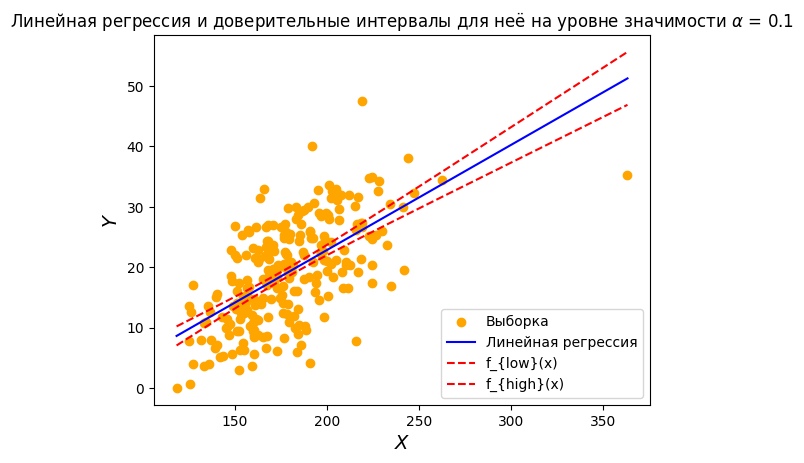

In [ ]:
plt.scatter(X, Y, label="Выборка", color="orange")
plt.plot(
    table["x"],
    table["f(x)"],
    label="Линейная регрессия",
    color="blue",
)

plt.plot(
    table["x"], table["f_low(x)"], label=r"f_{low}(x)", color="red", linestyle="--"
)
plt.plot(
    table["x"], table["f_high(x)"], label=r"f_{high}(x)", color="red", linestyle="--"
)

plt.legend()
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$Y$", fontsize=14)
plt.title(
    r"Линейная регрессия и доверительные интервалы для неё на уровне значимости $\alpha$ = 0.1"
)
plt.show()

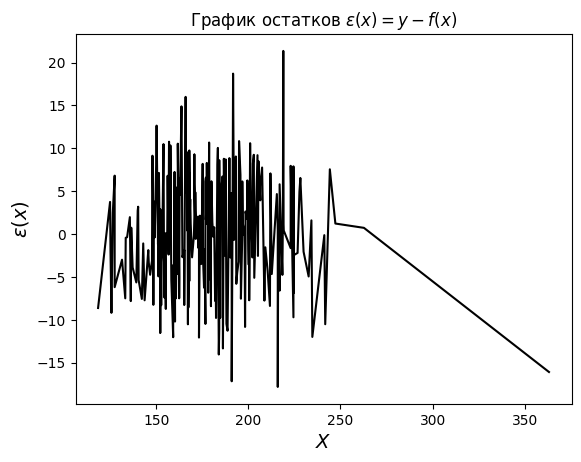

In [ ]:
plt.plot(table["x"], table["y"] - table["f(x)"], color="black")
plt.xlabel("$X$", fontsize=14)
plt.ylabel(r"$\varepsilon(x)$", fontsize=14)
plt.title(r"График остатков $\varepsilon(x) = y - f(x)$")
plt.show()

In [ ]:
alphas = [0.01, 0.05, 0.1]

z = r_value**2 * (n - 2) / (1 - r_value**2)

mprint(
    r"### Проверка значимости линейной регрессии",
    f"$H_0$: $\\beta_1 = 0$, $H_1$: $\\beta_1 \\neq 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости линейной регрессии

$H_0$: $\beta_1 = 0$, $H_1$: $\beta_1 \neq 0$

$z_{выб} =$ 150.03

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

#**Задание 9.2**

In [ ]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

252 252


In [ ]:
k = 3

In [ ]:
X.values.reshape(-1, 1)[:5]

array([[154.25],
       [173.25],
       [154.  ],
       [184.75],
       [184.25]])

In [ ]:
design_matrix = np.column_stack([X**i for i in range(3)])
design_matrix[:5]

array([[1.00000000e+00, 1.54250000e+02, 2.37930625e+04],
       [1.00000000e+00, 1.73250000e+02, 3.00155625e+04],
       [1.00000000e+00, 1.54000000e+02, 2.37160000e+04],
       [1.00000000e+00, 1.84750000e+02, 3.41325625e+04],
       [1.00000000e+00, 1.84250000e+02, 3.39480625e+04]])

In [ ]:
model = sm.OLS(Y, design_matrix).fit()

mprint(
    f"$\\tilde{{\\beta_0}} =$ {model.params.iloc[0]:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {model.params.iloc[1]:.2f}",
    f"$\\tilde{{\\beta_2}} =$ {model.params.iloc[2]:.2f}",
)

$\tilde{\beta_0} =$ -35.77

$\tilde{\beta_1} =$ 0.42

$\tilde{\beta_2} =$ -0.00

In [ ]:
predictions = model.predict(design_matrix)

In [ ]:
D_YX = sum((predictions - Y.mean()) ** 2) / n
D_resY = sum((predictions - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X} =$ 27.86

$\tilde{D}_{Y ост} =$ 41.90

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X, несмещ} =$ 3510.06

$\tilde{D}_{Y ост, несмещ} =$ 42.41

$\tilde{D}_{Y общ, несмещ} =$ 70.04

In [ ]:
mprint(
    f"$\\tilde{{R^2}} =$ {model.rsquared:.2f}",
    f"$\\tilde{{R}} =$ {math.sqrt(model.rsquared):.2f}",
)

$\tilde{R^2} =$ 0.40

$\tilde{R} =$ 0.63

In [ ]:
alpha = 0.1

In [ ]:
table = pd.DataFrame(
    np.column_stack(
        [X, Y, predictions, model.get_prediction(design_matrix).conf_int(alpha=alpha)]
    ),
    columns=[
        "x",
        "y",
        "f(x)",
        "f_low(x)",
        "f_high(x)",
    ],
)
table.sort_values("x", inplace=True)
table

,x,y,f(x),f_low(x),f_high(x)
181,118.50,0.0,5.500397,3.258073,7.742722
73,125.00,13.5,7.249473,5.326688,9.172258
44,125.25,7.7,7.315676,5.404567,9.226786
171,125.75,0.7,7.447845,5.559948,9.335742
225,126.50,12.5,7.645504,5.792076,9.498932
...,...,...,...,...,...
151,241.75,19.6,29.550000,27.923030,31.176970
191,244.25,38.1,29.838669,28.145117,31.532220
34,247.25,32.3,30.174618,28.396211,31.953024
40,262.75,34.5,31.728702,29.419660,34.037745


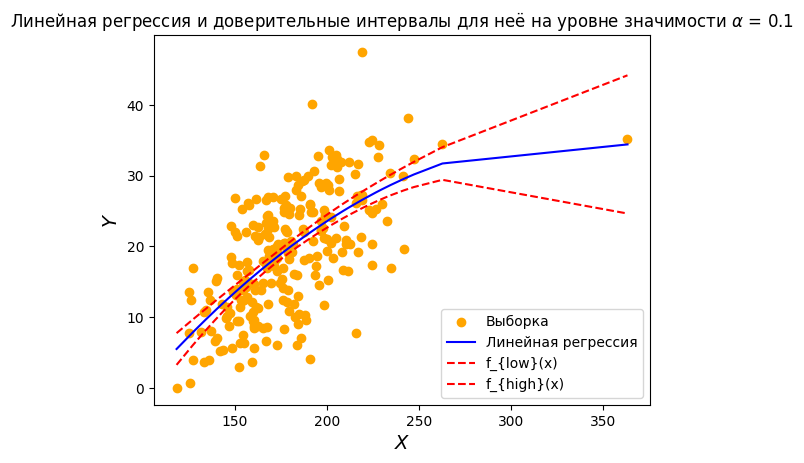

In [ ]:
plt.scatter(X, Y, label="Выборка", color="orange")
plt.plot(
    table["x"],
    table["f(x)"],
    label="Линейная регрессия",
    color="blue",
)

plt.plot(
    table["x"], table["f_low(x)"], label=r"f_{low}(x)", color="red", linestyle="--"
)
plt.plot(
    table["x"], table["f_high(x)"], label=r"f_{high}(x)", color="red", linestyle="--"
)

plt.legend()
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$Y$", fontsize=14)
plt.title(
    r"Линейная регрессия и доверительные интервалы для неё на уровне значимости $\alpha$ = 0.1"
)
plt.show()

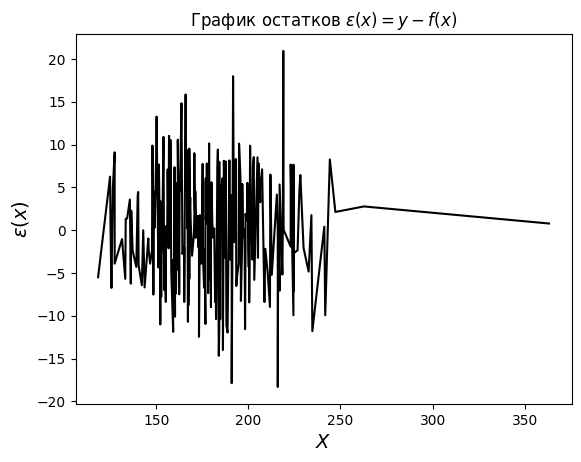

In [ ]:
plt.plot(table["x"], table["y"] - table["f(x)"], color="black")
plt.xlabel("$X$", fontsize=14)
plt.ylabel(r"$\varepsilon(x)$", fontsize=14)
plt.title(r"График остатков $\varepsilon(x) = y - f(x)$")
plt.show()

In [ ]:
alphas = [0.01, 0.05, 0.1]

z = model.fvalue
p_value = model.f_pvalue

mprint(
    r"### Проверка значимости линейной регрессии",
    f"$H_0$: $\\beta_1 = \\beta_2 = 0$, $H_1$: $\\beta_1^2 + \\beta_2^2 > 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости линейной регрессии

$H_0$: $\beta_1 = \beta_2 = 0$, $H_1$: $\beta_1^2 + \beta_2^2 > 0$

$z_{выб} =$ 82.77

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

#**Задание 9.3**

In [ ]:
sheetX = xls.parse(2)
X1 = sheetX['B7']
X2 = sheetX['B4']
X3 = sheetX['B2']


In [ ]:
print(n1 := len(X1), n2 := len(X2), n3 := len(Y))

if n1 == n2 == n3:
    n = n1

252 252 252


In [ ]:
k = 3

In [ ]:
vector_X = np.column_stack([X1, X2])
vector_X[:5]

array([[154.25,  23.  ],
       [173.25,  22.  ],
       [154.  ,  22.  ],
       [184.75,  26.  ],
       [184.25,  24.  ]])

In [ ]:
design_matrix = sm.add_constant(vector_X)
design_matrix[:5]

array([[  1.  , 154.25,  23.  ],
       [  1.  , 173.25,  22.  ],
       [  1.  , 154.  ,  22.  ],
       [  1.  , 184.75,  26.  ],
       [  1.  , 184.25,  24.  ]])

In [ ]:
model = sm.OLS(Y, design_matrix).fit()

mprint(
    f"$\\tilde{{\\beta_0}} =$ {model.params.iloc[0]:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {model.params.iloc[1]:.2f}",
    f"$\\tilde{{\\beta_2}} =$ {model.params.iloc[2]:.2f}",
)

$\tilde{\beta_0} =$ -21.17

$\tilde{\beta_1} =$ 0.18

$\tilde{\beta_2} =$ 0.20

In [ ]:
predictions = model.predict(design_matrix)

In [ ]:
D_YX = sum((predictions - Y.mean()) ** 2) / n
D_resY = sum((predictions - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X_1, X_2} =$ 32.41

$\tilde{D}_{Y ост} =$ 37.35

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X_1, X_2, несмещ} =$ 4083.82

$\tilde{D}_{Y ост, несмещ} =$ 37.80

$\tilde{D}_{Y общ, несмещ} =$ 70.04

In [ ]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} + \\tilde{{D}}_{{Y ост}} = {D_YX + D_resY:.2f}$",
)
print(D_YX + D_resY - D_Y < 1e-10)

$\tilde{D}_{Y \mid X_1, X_2} =$ 32.41

$\tilde{D}_{Y ост} =$ 37.35

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X_1, X_2} + \tilde{D}_{Y ост} = 69.76$

True


In [ ]:
mprint(
    f"$\\tilde{{R^2}} =$ {model.rsquared:.2f}",
    f"$\\tilde{{R}} =$ {math.sqrt(model.rsquared):.2f}",
)

$\tilde{R^2} =$ 0.46

$\tilde{R} =$ 0.68